In [1]:
%load_ext autoreload
%autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import support_utils as sup
import data_explore_utils as dex
import al_plot_utils as alut

from matplotlib import style
sns.set(style="whitegrid")
#sns.set_context("paper")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3,"font.size":19, "axes.labelsize":19,
    "axes.titlesize":19})
#, "xtick.labelsize","ytick.labelsize", "legend.fontsize"
sns.set_color_codes()

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
#from sklearn.gaussian_process import GaussianProcessClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',100)

In [3]:
saving = False

### Read in Candsets

In [4]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../candsets/authors/'
pattern_of_filename = 'candset_feature_(.{3}_.{3,4})'
sep = ','
# ***********************************************

candsets = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [5]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../candsets/authors/'
pattern_of_filename = 'candset_feature_(.{3}_.{3,4})_train'
sep = ','
# ***********************************************

candsets_train = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [6]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../candsets/authors/'
pattern_of_filename = 'candset_feature_(.{3}_.{3,4})_test'
sep = ','
# ***********************************************

candsets_test = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [7]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../datasets/authors/'
pattern_of_filename = '(.{3,4})'
sep = ','
# ***********************************************

datasets = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [8]:
datasets.keys()

dict_keys(['dnb', 'dbp', 'wiki', 'viaf'])

##### Feature

In [9]:
all_feature = ['deathdate_days_diff_sim', 'deathdate_months_diff_sim',
       'deathdate_years_diff_sim', 'gender_lev_sim', 'gender_jac_q3_sim',
       'gender_jac_an_sim', 'gender_rel_jac_an_sim', 'gender_containment_sim',
       'gender_exact_sim', 'work_cosine_tfidf_sim', 'work_lev_sim',
       'work_jac_q3_sim', 'work_jac_an_sim', 'work_rel_jac_an_sim',
       'work_containment_sim', 'work_exact_sim', 'name_lev_sim',
       'name_jac_q3_sim', 'name_jac_an_sim', 'name_rel_jac_an_sim',
       'name_containment_sim', 'name_exact_sim', 'birthdate_days_diff_sim',
       'birthdate_months_diff_sim', 'birthdate_years_diff_sim']

In [10]:
len(all_feature) == len(candsets['dbp_viaf'].columns.drop(['ids','label']))

True

In [11]:
# dense features for all combinations

# features excluded where the attribute has a very low density (<3%) for at 
# least one dataset that is involved either as source or target in the TL setting
rc_dbp_viaf_wiki = ['deathdate_days_diff_sim', 'deathdate_months_diff_sim',
       'deathdate_years_diff_sim', 'gender_lev_sim', 'gender_jac_q3_sim',
       'gender_jac_an_sim', 'gender_rel_jac_an_sim', 'gender_containment_sim',
       'gender_exact_sim', 'name_lev_sim',
       'name_jac_q3_sim', 'name_jac_an_sim', 'name_rel_jac_an_sim',
       'name_containment_sim', 'name_exact_sim', 'birthdate_days_diff_sim',
       'birthdate_months_diff_sim', 'birthdate_years_diff_sim']

rc_dbp_dnb_wiki = ['deathdate_days_diff_sim', 'deathdate_months_diff_sim',
       'deathdate_years_diff_sim', 'gender_lev_sim', 'gender_jac_q3_sim',
       'gender_jac_an_sim', 'gender_rel_jac_an_sim', 'gender_containment_sim',
       'gender_exact_sim', 'name_lev_sim',
       'name_jac_q3_sim', 'name_jac_an_sim', 'name_rel_jac_an_sim',
       'name_containment_sim', 'name_exact_sim', 'birthdate_days_diff_sim',
       'birthdate_months_diff_sim', 'birthdate_years_diff_sim']

rc_dbp_dnb_viaf = ['deathdate_days_diff_sim', 'deathdate_months_diff_sim',
       'deathdate_years_diff_sim', 'gender_lev_sim', 'gender_jac_q3_sim',
       'gender_jac_an_sim', 'gender_rel_jac_an_sim', 'gender_containment_sim',
       'gender_exact_sim', 'name_lev_sim',
       'name_jac_q3_sim', 'name_jac_an_sim', 'name_rel_jac_an_sim',
       'name_containment_sim', 'name_exact_sim', 'birthdate_days_diff_sim',
       'birthdate_months_diff_sim', 'birthdate_years_diff_sim']

# assign the different feature sets (different dense features depending on combination)
dense_features_dict = {'dbp_viaf_wiki':rc_dbp_viaf_wiki,'dbp_dnb_wiki':rc_dbp_dnb_wiki,
                       'dbp_dnb_viaf':rc_dbp_dnb_viaf}

In [12]:
datatype_dict = sup.importJSONFileInDict('./input/authors_type_per_column.json')

In [13]:
datatype_dict

{'birthdate': 'date',
 'deathdate': 'date',
 'gender': 'str',
 'name': 'str',
 'work': 'long_str'}

In [14]:
candsets.keys()

dict_keys(['dbp_dnb', 'dbp_wiki', 'dbp_viaf'])

In [15]:
print('Size of Datasources')
for df in datasets:
    print(df+': '+str(datasets[df].shape[0]))

Size of Datasources
dnb: 9998
dbp: 31604
wiki: 31480
viaf: 10186


### Data source-level

In [16]:
datasets['viaf']['viaf_gender'].value_counts()

male      7562
female    2385
Name: viaf_gender, dtype: int64

In [17]:
datasets['wiki']['wiki_birthdate'].value_counts()

1950-01-01 00:00:00    245
1953-01-01 00:00:00    159
2000-01-01 00:00:00    133
1951-01-01 00:00:00    109
1971-01-01 00:00:00     97
                      ... 
1786-00-00 00:00:00      1
1944-12-30 00:00:00      1
1908-04-29 00:00:00      1
1946-08-04 00:00:00      1
1901-12-24 00:00:00      1
Name: wiki_birthdate, Length: 18114, dtype: int64

In [18]:
datasets['dnb']['dnb_gender'].value_counts()

male        4278
notKnown    4123
female      1461
Name: dnb_gender, dtype: int64

In [19]:
datasets['dbp']['dbp_gender'].value_counts()

male                  22377
female                 9218
genderqueer               4
transgender female        2
female creature           1
intersex                  1
transgender male          1
Name: dbp_gender, dtype: int64

In [20]:
dfs_d_vp = {}
for df in datasets:
    ser = pd.Series(1-datasets[df].replace(-1,np.nan).isnull().sum()/len(datasets[df]))
    ser.index = [x.split('_')[1] for x in ser.index]
    ser.drop(index=['id','uri'],inplace=True)
    ser2 = pd.Series(1-datasets[df].replace(-1,np.nan).nunique()/len(datasets[df]))
    ser2.index = [x.split('_')[1] for x in ser2.index]
    ser2.drop(index=['id','uri'],inplace=True)
    df1 = pd.DataFrame(ser,columns=['Density'])
    df2 = pd.DataFrame(ser2,columns=['Value Overlap'])
    temp = pd.merge(df1,df2,left_index=True,right_index=True)
    temp['attr'] = temp.index
    dfs_d_vp.update({df:pd.melt(temp, id_vars='attr', var_name="dimension", value_name="values")})

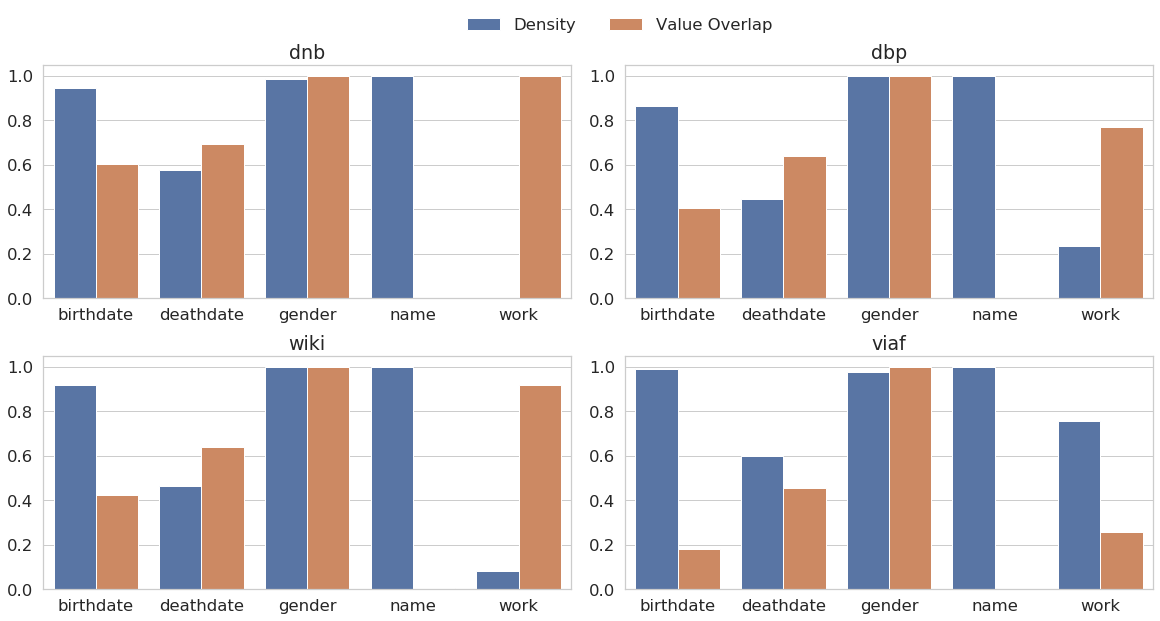

In [21]:
fig,axes = plt.subplots(2,2,figsize=(16,8),constrained_layout=True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

palette ={'Density':'C0','Value Overlap':'C1'}
g = sns.barplot(x='attr',y='values',data=dfs_d_vp['dnb'].sort_values('attr'),hue='dimension',ax=axes[0][0],palette=palette,
                hue_order= ['Density', 'Value Overlap'])
axes[0][0].set_title('dnb')
g.legend_.remove()
axes[0][0].set_ylabel('')
axes[0][0].set_xlabel('')
g = sns.barplot(x='attr',y='values',data=dfs_d_vp['dbp'].sort_values('attr'),hue='dimension',ax=axes[0][1],palette=palette,
                hue_order= ['Density', 'Value Overlap'])
axes[0][1].set_title('dbp')
g.legend_.remove()
axes[0][1].set_ylabel('')
axes[0][1].set_xlabel('')
g = sns.barplot(x='attr',y='values',data=dfs_d_vp['wiki'].sort_values('attr'),hue='dimension',ax=axes[1][0],palette=palette,
                hue_order= ['Density', 'Value Overlap'])
axes[1][0].set_title('wiki')
g.legend_.remove()
axes[1][0].set_ylabel('')
axes[1][0].set_xlabel('')
g = sns.barplot(x='attr',y='values',data=dfs_d_vp['viaf'].sort_values('attr'),hue='dimension',ax=axes[1][1],palette=palette,
                hue_order= ['Density', 'Value Overlap'])
axes[1][1].set_title('viaf')
g.legend_.remove()
axes[1][1].set_ylabel('')
axes[1][1].set_xlabel('')
#plt.legend(loc='best')
lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, loc='lower left', bbox_to_anchor= (0.4, 1.01), ncol=2,
            borderaxespad=0, frameon=False)
#ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
#            borderaxespad=0, frameon=False)
#fig.suptitle('Attribute Profiling')
#fig.savefig('../results/data_profiling/authors/authors_dslevel_den_vp.png',dpi=600,bbox_inches='tight')

In [22]:
result = pd.DataFrame()
for df in datasets:
    ds = datasets[df].drop(columns=[df+'_id',df+'_uri'])
    ds.replace(np.nan,'nan',inplace=True)
    temp = pd.DataFrame()
    temp['source'] = ds.apply(lambda x: df,axis=1)
    for col in ds:
        temp[col.split('_')[1]] = ds[col].apply(lambda s: len(s) if s!='nan' else np.nan)
    result = result.append(temp)
result = pd.melt(result, id_vars='source', var_name="attr", value_name="values")

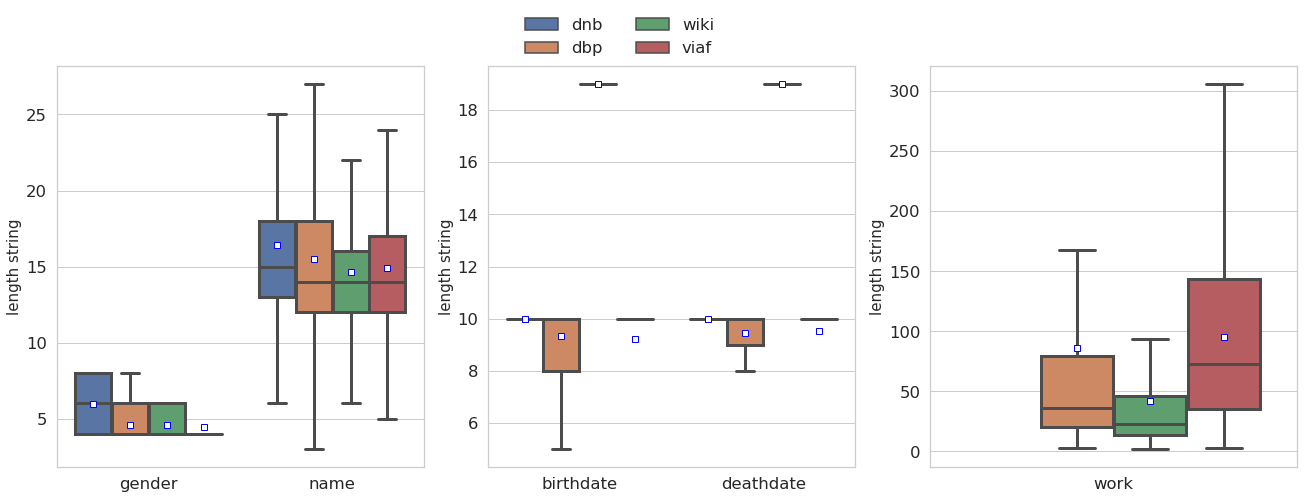

In [23]:
fig,axes = plt.subplots(1,3,figsize=(18,6),constrained_layout=True)

palette ={'dnb':'C0','dbp':'C1','wiki':'C2','viaf':'C3'}
g = sns.boxplot(x='attr',y='values',data=result[(result['attr']!='birthdate') & (result['attr']!='deathdate') & (result['attr']!='work')],hue='source',ax=axes[0], showfliers = False,showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order= ['dnb', 'dbp','wiki','viaf'])
g.legend_.remove()
axes[0].set_ylabel('length string',fontsize=15)
axes[0].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=result[(result['attr']=='birthdate') | (result['attr']=='deathdate')],hue='source',ax=axes[1], showfliers = False,showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order= ['dnb', 'dbp','wiki','viaf'])
g.legend_.remove()
axes[1].set_ylabel('length string',fontsize=15)
axes[1].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=result[(result['attr']=='work')],hue='source',ax=axes[2], showfliers = False,showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order= ['dnb', 'dbp','wiki','viaf'])
g.legend_.remove()
axes[2].set_ylabel('length string',fontsize=15)
axes[2].set_xlabel('')
lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, loc='lower left', bbox_to_anchor= (0.4, 1.01), ncol=2,
            borderaxespad=0, frameon=False)

#fig.suptitle('Attribute Length')
#fig.savefig('../results/data_profiling/authors/authors_dslevel_attr_length.png',dpi=600,bbox_inches='tight')

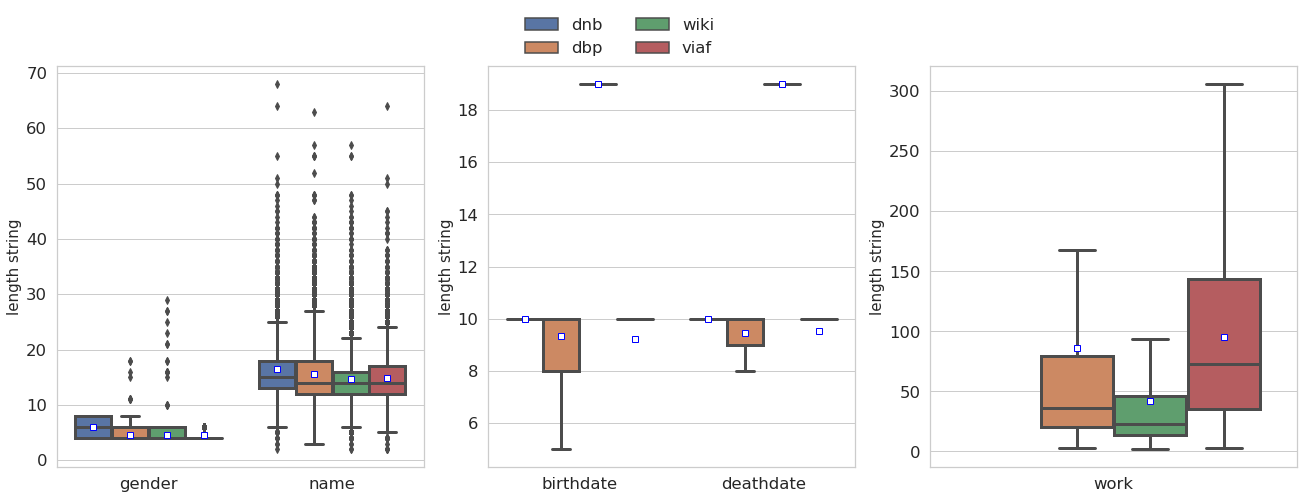

In [24]:
fig,axes = plt.subplots(1,3,figsize=(18,6),constrained_layout=True)

palette ={'dnb':'C0','dbp':'C1','wiki':'C2','viaf':'C3'}
g = sns.boxplot(x='attr',y='values',data=result[(result['attr']!='birthdate') & (result['attr']!='deathdate') & (result['attr']!='work')],hue='source',ax=axes[0], showfliers = True,showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order= ['dnb', 'dbp','wiki','viaf'])
g.legend_.remove()
axes[0].set_ylabel('length string',fontsize=15)
axes[0].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=result[(result['attr']=='birthdate') | (result['attr']=='deathdate')],hue='source',ax=axes[1], showfliers = False,showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order= ['dnb', 'dbp','wiki','viaf'])
g.legend_.remove()
axes[1].set_ylabel('length string',fontsize=15)
axes[1].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=result[(result['attr']=='work')],hue='source',ax=axes[2], showfliers = False,showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order= ['dnb', 'dbp','wiki','viaf'])
g.legend_.remove()
axes[2].set_ylabel('length string',fontsize=15)
axes[2].set_xlabel('')
lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, loc='lower left', bbox_to_anchor= (0.4, 1.01), ncol=2,
            borderaxespad=0, frameon=False)

#fig.suptitle('Attribute Length')
#fig.savefig('../results/data_profiling/authors/authors_dslevel_attr_length.png',dpi=600,bbox_inches='tight')

### Candidate set-level

In [25]:
results_non_agg = {}
for df in candsets:
    temp = pd.DataFrame()
    #temp['source'] = candsets[df].apply(lambda x: df,axis=1)
    temp['label']  = candsets[df]['label'].apply(lambda s: 'match' if s==1 else 'non-match')
    for attr in datatype_dict:
        #shape = candsets[df].replace(-1,np.nan).filter(regex=attr).shape
        temp[attr] = candsets[df].replace(-1,np.nan).filter(regex=attr).mean(axis=1,skipna=True)
    results_non_agg.update({df:pd.melt(temp, id_vars='label', var_name="attr", value_name="values")})

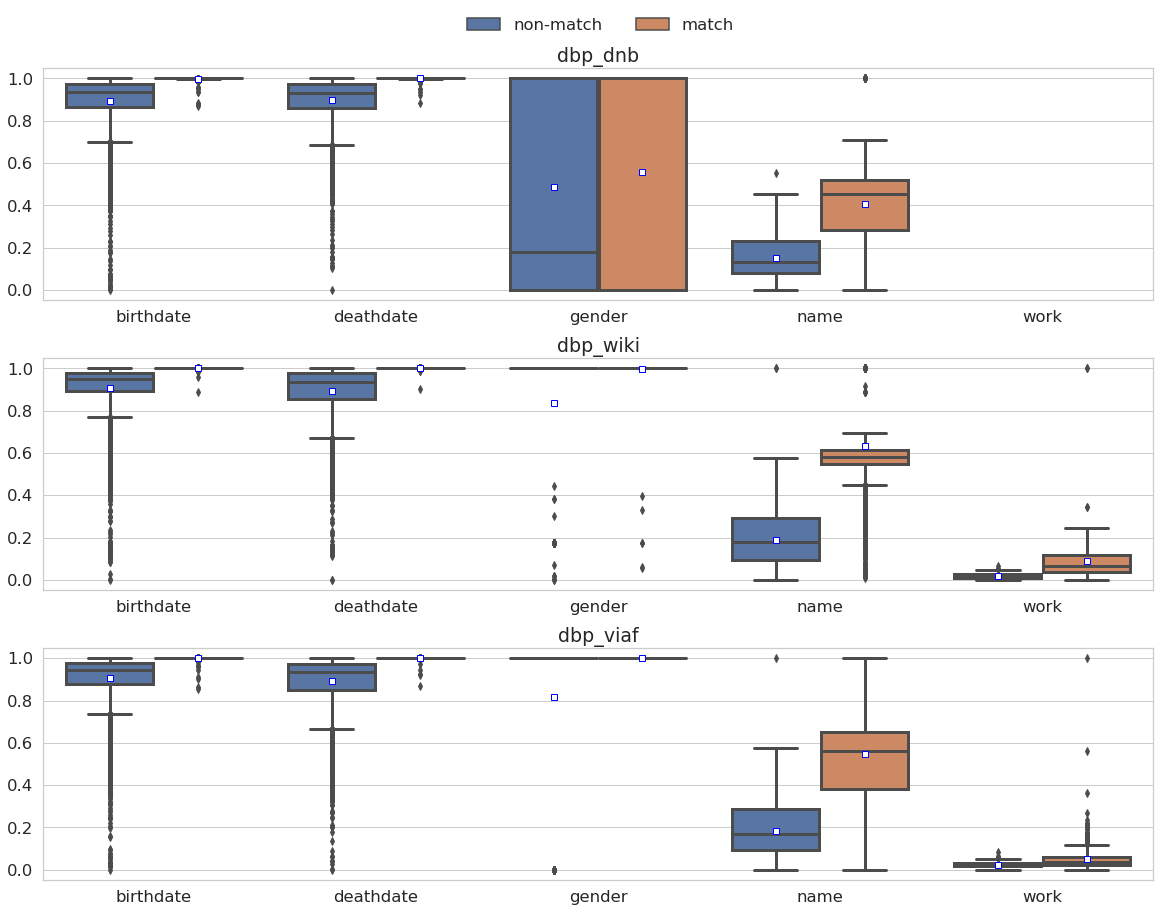

In [26]:
fig,axes = plt.subplots(3,1,figsize=(16,12),constrained_layout=True)

palette ={'non-match':'C0','match':'C1'}
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g = sns.boxplot(x='attr',y='values',data=results_non_agg['dbp_dnb'],hue='label',ax=axes[0],showmeans=True,
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order= ['non-match', 'match'])
axes[0].set_title('dbp_dnb')
g.legend_.remove()
axes[0].set_ylabel('')
axes[0].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['dbp_wiki'],hue='label',ax=axes[1],showmeans=True,
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order= ['non-match', 'match'])
axes[1].set_title('dbp_wiki')
g.legend_.remove()
axes[1].set_ylabel('')
axes[1].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['dbp_viaf'],hue='label',ax=axes[2],showmeans=True,
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order= ['non-match', 'match'])
axes[2].set_title('dbp_viaf')
g.legend_.remove()
axes[2].set_ylabel('')
axes[2].set_xlabel('')
#plt.legend(loc='best')
lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, loc='lower left', bbox_to_anchor= (0.4, 1.01), ncol=2,
            borderaxespad=0, frameon=False)
#ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
#            borderaxespad=0, frameon=False)
#fig.suptitle('Agg. Sim Scores per Attribute separated by Label')
#fig.savefig('../results/data_profiling/authors/authors_cslevel_agg_sim_score_hue.png',dpi=600,bbox_inches='tight')

Text(0.5, 0, '')

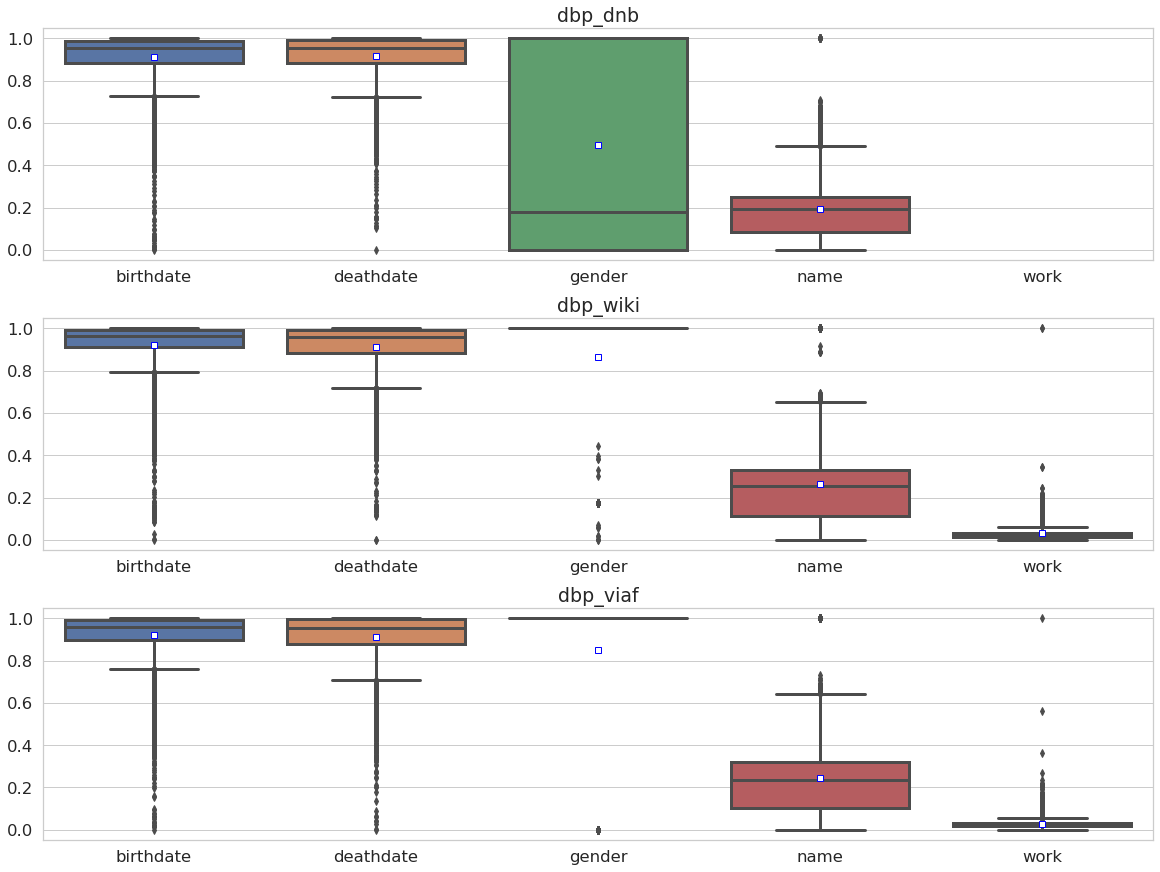

In [27]:
fig,axes = plt.subplots(3,1,figsize=(16,12),constrained_layout=True)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g = sns.boxplot(x='attr',y='values',data=results_non_agg['dbp_dnb'],ax=axes[0],showmeans=True,
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
axes[0].set_title('dbp_dnb')
#g.legend_.remove()
axes[0].set_ylabel('')
axes[0].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['dbp_wiki'],ax=axes[1],showmeans=True,
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
axes[1].set_title('dbp_wiki')
#g.legend_.remove()
axes[1].set_ylabel('')
axes[1].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['dbp_viaf'],ax=axes[2],showmeans=True,
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
axes[2].set_title('dbp_viaf')
#g.legend_.remove()
axes[2].set_ylabel('')
axes[2].set_xlabel('')
#plt.legend(loc='best')
#lines, labels = fig.axes[-1].get_legend_handles_labels()
    
#fig.legend(lines, labels, loc='lower left', bbox_to_anchor= (0.4, 1.01), ncol=2,
#            borderaxespad=0, frameon=False)
#ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
#            borderaxespad=0, frameon=False)
#fig.suptitle('Agg. Sim Scores per Attribute separated by Label')
#fig.savefig('../results/data_profiling/authors/authors_cslevel_agg_sim_score.png',dpi=600,bbox_inches='tight')

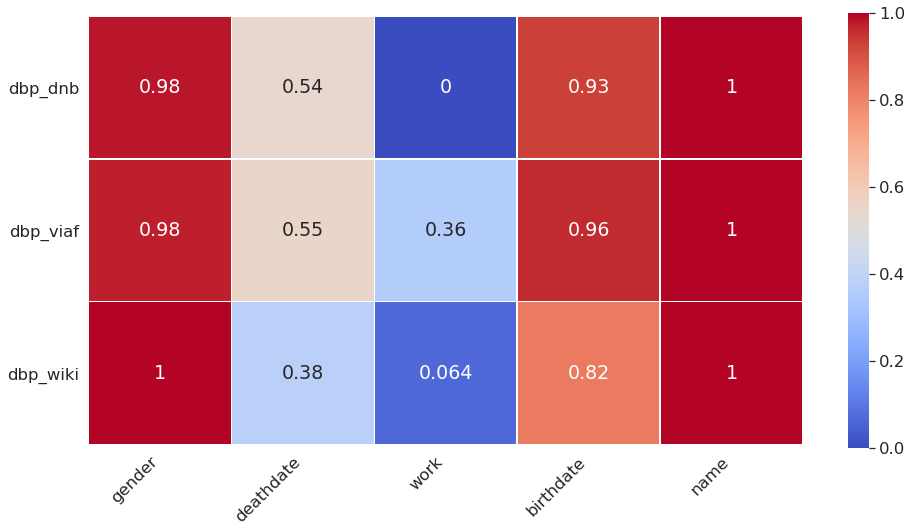

In [28]:
all_nan_share = []
for i,df in enumerate(candsets):
    if(i==0):
        temp = candsets[df].copy()
        temp['source'] = temp.iloc[:,0].apply(lambda x: df)
        final = temp
    temp = candsets[df].copy()
    temp['source'] = temp.iloc[:,0].apply(lambda x: df)
    final = final.append(temp)
try:
    #final.drop(columns='ids',inplace=True)
    final.drop(columns='label',inplace=True)
except KeyError:
    pass
all_nan_share = final.replace(-1,np.nan).groupby('source').count().div(final.replace(-1,np.nan).groupby('source').count().iloc[:,0],axis='index')
#attributes = list(set([s.split('_')[0] for s in list(all_nan_share.columns) if (s != 'ids' or s !='label')]))
mapper = {}
for col in final.columns:
    mapper.update({col:col.split('_')[0]})
all_nan_share.rename(columns=mapper,inplace=True)
all_nan_share = all_nan_share.loc[:,~all_nan_share.columns.duplicated()]
plt.figure(figsize=(16,8))
g = sns.heatmap(all_nan_share.drop(columns='ids'),annot=True,square=True,cmap='coolwarm',linewidths=.5)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
#g.set_title('Density of Attributes for all Candidate Sets')
g.set_ylabel('')
fig = g.get_figure()
#fig.savefig('../results/data_profiling/authors/authors_cslevel_attr_density_heatmap.png',dpi=600,bbox_inches='tight')

## Data Profiling of Correspondences Set (aka candset)

### Data Profiling dbp_dnb

In [29]:
ds1_name = 'dbp'
ds2_name = 'dnb'
combo = '{}_{}'.format(ds1_name,ds2_name)

#### All Feature

##### Training Set

In [30]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_train[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]
data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [31]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Training Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/authors/{combo}_summary_table_train.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=dbp ds2=dnb Training Set
#ds1,31604
#ds2,9998
#record_pairs,10592
#attr,6
#non-match,8828
#match,1764
ratio_pos,0.166541
ratio_neg,0.833459
#short_string_attr,2
#long_string_attr,1


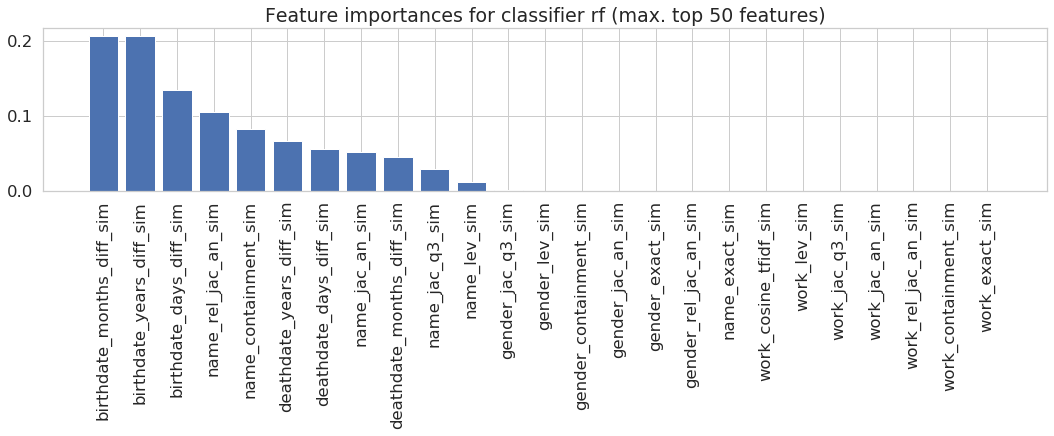

In [32]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [33]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Training Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/authors/{combo}_profiling_all_feature_train.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: dbp_dnb Training Set
matching_relevant_features,"['birthdate_months_diff_sim', 'birthdate_years_diff_sim', 'birthdate_days_diff_sim', 'name_rel_jac_an_sim', 'name_containment_sim', 'deathdate_years_diff_sim', 'deathdate_days_diff_sim', 'name_jac_an_sim', 'deathdate_months_diff_sim', 'name_jac_q3_sim', 'name_lev_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'deathdate', 'birthdate', 'name'}"
matching_relevant_attributes_count,3
matching_relevant_attributes_density,0.860000
top_matching_relevant_features_count,4
F1_xval_max,0.980000
F1_xval_top_matching_relevant_features,0.960000
top_matching_relevant_features,"['birthdate_months_diff_sim', 'birthdate_years_diff_sim', 'birthdate_days_diff_sim', 'name_rel_jac_an_sim']"
top_relevant_attributes,"{'birthdate', 'name'}"


##### Test Set

In [34]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_test[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [35]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Test Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/authors/{combo}_summary_table_test.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=dbp ds2=dnb Test Set
#ds1,31604
#ds2,9998
#record_pairs,5217
#attr,6
#non-match,4348
#match,869
ratio_pos,0.166571
ratio_neg,0.833429
#short_string_attr,2
#long_string_attr,1


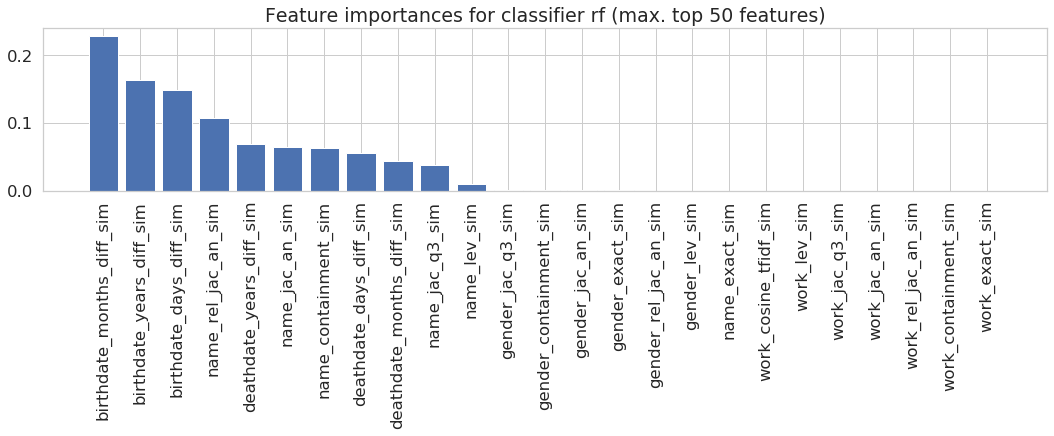

In [36]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [37]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Test Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/authors/{combo}_profiling_all_feature_test.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: dbp_dnb Test Set
matching_relevant_features,"['birthdate_months_diff_sim', 'birthdate_years_diff_sim', 'birthdate_days_diff_sim', 'name_rel_jac_an_sim', 'deathdate_years_diff_sim', 'name_jac_an_sim', 'name_containment_sim', 'deathdate_days_diff_sim', 'deathdate_months_diff_sim', 'name_jac_q3_sim', 'name_lev_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'deathdate', 'birthdate', 'name'}"
matching_relevant_attributes_count,3
matching_relevant_attributes_density,0.860000
top_matching_relevant_features_count,4
F1_xval_max,0.990000
F1_xval_top_matching_relevant_features,0.950000
top_matching_relevant_features,"['birthdate_months_diff_sim', 'birthdate_years_diff_sim', 'birthdate_days_diff_sim', 'name_rel_jac_an_sim']"
top_relevant_attributes,"{'birthdate', 'name'}"


##### The whole Dataset

In [38]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [39]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Whole Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/authors/{combo}_summary_table_whole_set.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=dbp ds2=dnb Whole Set
#ds1,31604
#ds2,9998
#record_pairs,15809
#attr,6
#non-match,13176
#match,2633
ratio_pos,0.166551
ratio_neg,0.833449
#short_string_attr,2
#long_string_attr,1


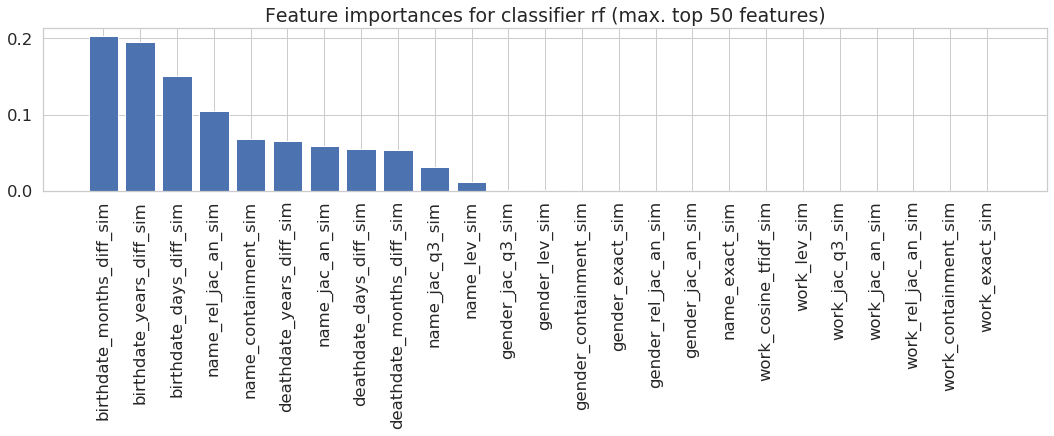

In [40]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [41]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Whole Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/authors/{combo}_profiling_all_feature_whole_set.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: dbp_dnb Whole Set
matching_relevant_features,"['birthdate_months_diff_sim', 'birthdate_years_diff_sim', 'birthdate_days_diff_sim', 'name_rel_jac_an_sim', 'name_containment_sim', 'deathdate_years_diff_sim', 'name_jac_an_sim', 'deathdate_days_diff_sim', 'deathdate_months_diff_sim', 'name_jac_q3_sim', 'name_lev_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'deathdate', 'birthdate', 'name'}"
matching_relevant_attributes_count,3
matching_relevant_attributes_density,0.860000
top_matching_relevant_features_count,4
F1_xval_max,0.980000
F1_xval_top_matching_relevant_features,0.950000
top_matching_relevant_features,"['birthdate_months_diff_sim', 'birthdate_years_diff_sim', 'birthdate_days_diff_sim', 'name_rel_jac_an_sim']"
top_relevant_attributes,"{'birthdate', 'name'}"


### Data Profiling dbp_viaf

In [42]:
ds1_name = 'dbp'
ds2_name = 'viaf'
combo = '{}_{}'.format(ds1_name,ds2_name)

#### All Feature

##### Training Set

In [43]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_train[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]
data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [44]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Training Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/authors/{combo}_summary_table_train.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=dbp ds2=viaf Training Set
#ds1,31604
#ds2,10186
#record_pairs,12826
#attr,6
#non-match,10689
#match,2137
ratio_pos,0.166615
ratio_neg,0.833385
#short_string_attr,2
#long_string_attr,1


In [45]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Training Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/authors/{combo}_summary_table_train.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=dbp ds2=viaf Training Set
#ds1,31604
#ds2,10186
#record_pairs,12826
#attr,6
#non-match,10689
#match,2137
ratio_pos,0.166615
ratio_neg,0.833385
#short_string_attr,2
#long_string_attr,1


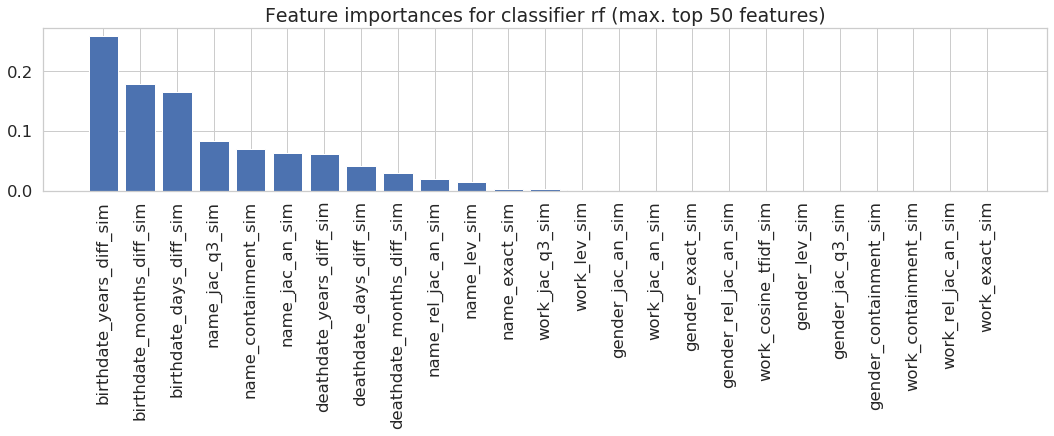

In [46]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [47]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Training Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/authors/{combo}_profiling_all_feature_train.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: dbp_viaf Training Set
matching_relevant_features,"['birthdate_years_diff_sim', 'birthdate_months_diff_sim', 'birthdate_days_diff_sim', 'name_jac_q3_sim', 'name_containment_sim', 'name_jac_an_sim', 'deathdate_years_diff_sim', 'deathdate_days_diff_sim', 'deathdate_months_diff_sim', 'name_rel_jac_an_sim', 'name_lev_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'deathdate', 'birthdate', 'name'}"
matching_relevant_attributes_count,3
matching_relevant_attributes_density,0.870000
top_matching_relevant_features_count,4
F1_xval_max,0.980000
F1_xval_top_matching_relevant_features,0.960000
top_matching_relevant_features,"['birthdate_years_diff_sim', 'birthdate_months_diff_sim', 'birthdate_days_diff_sim', 'name_jac_q3_sim']"
top_relevant_attributes,"{'birthdate', 'name'}"


In [48]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Training Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/authors/{combo}_profiling_all_feature_train.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: dbp_viaf Training Set
matching_relevant_features,"['birthdate_years_diff_sim', 'birthdate_months_diff_sim', 'birthdate_days_diff_sim', 'name_jac_q3_sim', 'name_containment_sim', 'name_jac_an_sim', 'deathdate_years_diff_sim', 'deathdate_days_diff_sim', 'deathdate_months_diff_sim', 'name_rel_jac_an_sim', 'name_lev_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'deathdate', 'birthdate', 'name'}"
matching_relevant_attributes_count,3
matching_relevant_attributes_density,0.870000
top_matching_relevant_features_count,4
F1_xval_max,0.980000
F1_xval_top_matching_relevant_features,0.960000
top_matching_relevant_features,"['birthdate_years_diff_sim', 'birthdate_months_diff_sim', 'birthdate_days_diff_sim', 'name_jac_q3_sim']"
top_relevant_attributes,"{'birthdate', 'name'}"


##### Test Set

In [49]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_test[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [50]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Test Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/authors/{combo}_summary_table_test.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=dbp ds2=viaf Test Set
#ds1,31604
#ds2,10186
#record_pairs,6318
#attr,6
#non-match,5266
#match,1052
ratio_pos,0.166508
ratio_neg,0.833492
#short_string_attr,2
#long_string_attr,1


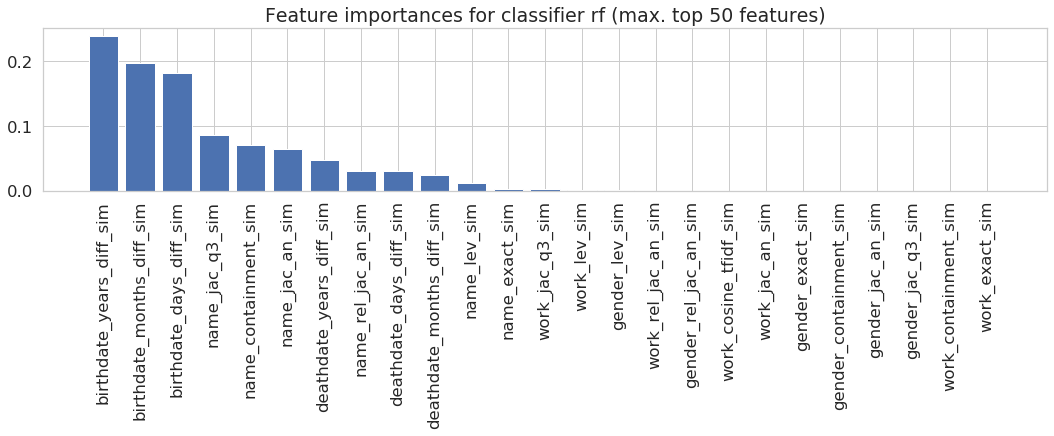

In [51]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [52]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Test Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/authors/{combo}_profiling_all_feature_test.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: dbp_viaf Test Set
matching_relevant_features,"['birthdate_years_diff_sim', 'birthdate_months_diff_sim', 'birthdate_days_diff_sim', 'name_jac_q3_sim', 'name_containment_sim', 'name_jac_an_sim', 'deathdate_years_diff_sim', 'name_rel_jac_an_sim', 'deathdate_days_diff_sim', 'deathdate_months_diff_sim', 'name_lev_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'deathdate', 'birthdate', 'name'}"
matching_relevant_attributes_count,3
matching_relevant_attributes_density,0.870000
top_matching_relevant_features_count,2
F1_xval_max,0.990000
F1_xval_top_matching_relevant_features,0.950000
top_matching_relevant_features,"['birthdate_years_diff_sim', 'birthdate_months_diff_sim']"
top_relevant_attributes,{'birthdate'}


##### The whole Dataset

In [53]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [54]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Whole Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/authors/{combo}_summary_table_whole_set.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=dbp ds2=viaf Whole Set
#ds1,31604
#ds2,10186
#record_pairs,19144
#attr,6
#non-match,15955
#match,3189
ratio_pos,0.16658
ratio_neg,0.83342
#short_string_attr,2
#long_string_attr,1


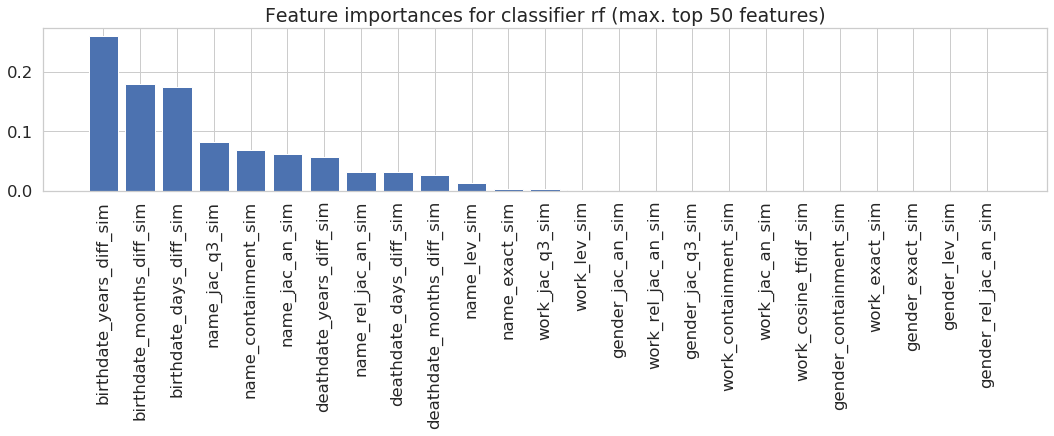

In [55]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [56]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Whole Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/authors/{combo}_profiling_all_feature_whole_set.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: dbp_viaf Whole Set
matching_relevant_features,"['birthdate_years_diff_sim', 'birthdate_months_diff_sim', 'birthdate_days_diff_sim', 'name_jac_q3_sim', 'name_containment_sim', 'name_jac_an_sim', 'deathdate_years_diff_sim', 'name_rel_jac_an_sim', 'deathdate_days_diff_sim', 'deathdate_months_diff_sim', 'name_lev_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'deathdate', 'birthdate', 'name'}"
matching_relevant_attributes_count,3
matching_relevant_attributes_density,0.870000
top_matching_relevant_features_count,4
F1_xval_max,0.990000
F1_xval_top_matching_relevant_features,0.970000
top_matching_relevant_features,"['birthdate_years_diff_sim', 'birthdate_months_diff_sim', 'birthdate_days_diff_sim', 'name_jac_q3_sim']"
top_relevant_attributes,"{'birthdate', 'name'}"


### Data Profiling dbp_wiki

In [57]:
ds1_name = 'dbp'
ds2_name = 'wiki'
combo = '{}_{}'.format(ds1_name,ds2_name)

#### All Feature

##### Training Set

In [58]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_train[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]
data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [59]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Training Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/authors/{combo}_summary_table_train.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=dbp ds2=wiki Training Set
#ds1,31604
#ds2,31480
#record_pairs,16103
#attr,6
#non-match,13420
#match,2683
ratio_pos,0.166615
ratio_neg,0.833385
#short_string_attr,2
#long_string_attr,1


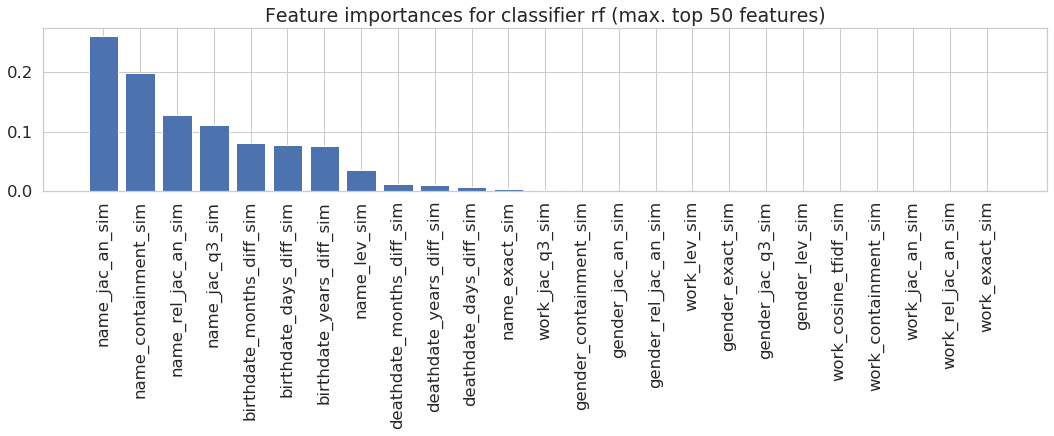

In [60]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [61]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Training Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/authors/{combo}_profiling_all_feature_train.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: dbp_wiki Training Set
matching_relevant_features,"['name_jac_an_sim', 'name_containment_sim', 'name_rel_jac_an_sim', 'name_jac_q3_sim', 'birthdate_months_diff_sim', 'birthdate_days_diff_sim', 'birthdate_years_diff_sim', 'name_lev_sim', 'deathdate_months_diff_sim', 'deathdate_years_diff_sim', 'deathdate_days_diff_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'deathdate', 'birthdate', 'name'}"
matching_relevant_attributes_count,3
matching_relevant_attributes_density,0.780000
top_matching_relevant_features_count,1
F1_xval_max,1.000000
F1_xval_top_matching_relevant_features,0.970000
top_matching_relevant_features,['name_jac_an_sim']
top_relevant_attributes,{'name'}


##### Test Set

In [62]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_test[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [63]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Test Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/authors/{combo}_summary_table_test.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=dbp ds2=wiki Test Set
#ds1,31604
#ds2,31480
#record_pairs,7932
#attr,6
#non-match,6610
#match,1322
ratio_pos,0.166667
ratio_neg,0.833333
#short_string_attr,2
#long_string_attr,1


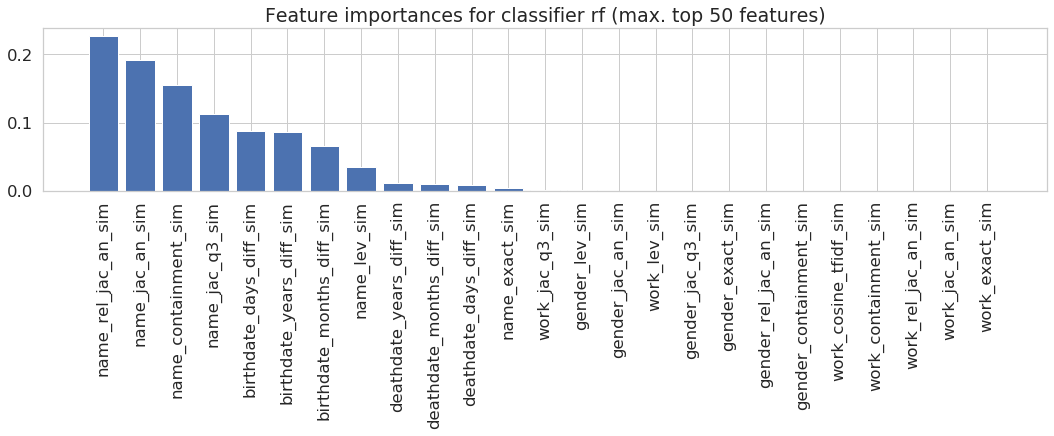

In [64]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [65]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Test Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/authors/{combo}_profiling_all_feature_test.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: dbp_wiki Test Set
matching_relevant_features,"['name_rel_jac_an_sim', 'name_jac_an_sim', 'name_containment_sim', 'name_jac_q3_sim', 'birthdate_days_diff_sim', 'birthdate_years_diff_sim', 'birthdate_months_diff_sim', 'name_lev_sim', 'deathdate_years_diff_sim', 'deathdate_months_diff_sim', 'deathdate_days_diff_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'deathdate', 'birthdate', 'name'}"
matching_relevant_attributes_count,3
matching_relevant_attributes_density,0.780000
top_matching_relevant_features_count,1
F1_xval_max,1.000000
F1_xval_top_matching_relevant_features,0.960000
top_matching_relevant_features,['name_rel_jac_an_sim']
top_relevant_attributes,{'name'}


##### The whole Dataset

In [66]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [67]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Whole Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/authors/{combo}_summary_table_whole_set.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=dbp ds2=wiki Whole Set
#ds1,31604
#ds2,31480
#record_pairs,24035
#attr,6
#non-match,20030
#match,4005
ratio_pos,0.166632
ratio_neg,0.833368
#short_string_attr,2
#long_string_attr,1


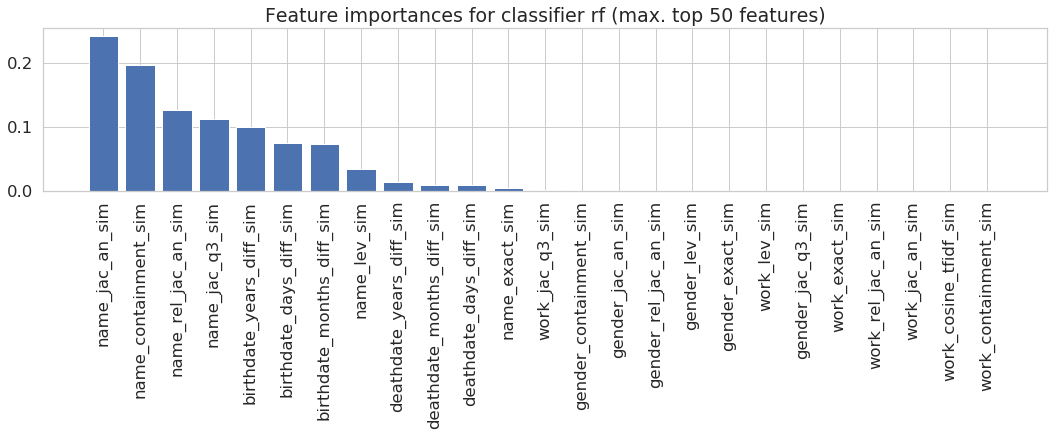

In [68]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [69]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Whole Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/authors/{combo}_profiling_all_feature_whole_set.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: dbp_wiki Whole Set
matching_relevant_features,"['name_jac_an_sim', 'name_containment_sim', 'name_rel_jac_an_sim', 'name_jac_q3_sim', 'birthdate_years_diff_sim', 'birthdate_days_diff_sim', 'birthdate_months_diff_sim', 'name_lev_sim', 'deathdate_years_diff_sim', 'deathdate_months_diff_sim', 'deathdate_days_diff_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'deathdate', 'birthdate', 'name'}"
matching_relevant_attributes_count,3
matching_relevant_attributes_density,0.780000
top_matching_relevant_features_count,1
F1_xval_max,1.000000
F1_xval_top_matching_relevant_features,0.960000
top_matching_relevant_features,['name_jac_an_sim']
top_relevant_attributes,{'name'}


In [ ]:
%reset Out

## Calculate Passive Learning Benchmark

In [70]:
random_state = 42
estimators_super = {
    'logreg':LogisticRegression(random_state=random_state,solver='liblinear',max_iter=1000),
    'logregcv':LogisticRegressionCV(random_state=random_state,cv=5,solver='liblinear',max_iter=1000),
    'svm':LinearSVC(random_state=random_state,dual=False),
    'dectree':DecisionTreeClassifier(random_state=random_state),
    'randforest':RandomForestClassifier(random_state=random_state,n_estimators=10),
    #'svm':SVC(random_state=random_state,kernel='linear'),
    'xgb':xgb.XGBClassifier(random_state=random_state,objective="binary:logistic")}#,
    #'gpc':GaussianProcessClassifier(random_state=random_state)}

In [ ]:
#candsets_super_results = dex.returnSuperBMsInDict(candsets_train,candsets_test,estimators_super,
#                                                  all_feature,progress_bar=True)

In [ ]:
df_super = alut.returnDFWithSuper(candsets_super_results,
                                 filename='../results/benchmarks/authors_passive_learning_baseline')

In [ ]:
#sup.saveResultsToJSON(candsets_super_results,'../results/benchmarks/authors_candsets_super_results')

#### Calculate Unsupervised Benchmark

In [ ]:
#candsets_unsuper_results = dex.returnUnsuperBMsInDict(candsets_test, label='label')

In [ ]:
#sup.saveResultsToJSON(candsets_unsuper_results,'../results/benchmarks/authors_candsets_unsuper_results')

In [ ]:
df_unsuper = alut.returnDFWithUnsuper(candsets_unsuper_results,
                                 filename='../results/benchmarks/authors_unsupervised_baseline')

## Calculate Domain Relatedness

In [ ]:
domain_relatedness = dex.calcDomainRelatednessCVinDict(candsets, all_feature, dense_features_dict, cv=5, metric='phi')

In [ ]:
pd.DataFrame.from_dict(domain_relatedness, orient='index').apply(lambda x: round(x,3))